In [49]:
# Importing libs

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [50]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    return s

In [51]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [52]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [53]:
# GD optimize

def gd_optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [54]:
# SGD optimize

def sgd_optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):

    costs = []
    batch_size = 256

    for i in range(num_iterations):
                
        # Cost and gradient calculation
        batch = np.random.choice(len(X), batch_size)
        grads, cost = propagate(w, b, X[:,batch], Y[batch])
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [55]:
# ADAM optimize

def adam_optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):

    costs = []
    batch_size = 256
    beta_1 = 0.9
    beta_2 = 0.999
    epsilon = 1e-08
    u0,s0,wb0 = 0,0,0

    for i in range(num_iterations):
                
        # Cost and gradient calculation
        batch = np.random.choice(len(X),batch_size)
        grads, cost = propagate(w, b, X[:,batch], Y[batch])

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        dwb = np.append(dw.T,db)

        # update rule
        u = beta_1 * u0 + (1 - beta_1) * dwb
        u_corr = u / (1 - beta_1 ** (i + 1))
        s = beta_2 * s0 + (1 - beta_2) * (dwb ** 2)
        s_corr = s / (1 - beta_2 ** (i + 1))
        wb = wb0 - learning_rate * u_corr / (np.sqrt(s_corr) + epsilon)
        w = (wb[:len(wb) - 1])
        w = w.reshape(len(w), 1)
        b = wb[len(wb) - 1]
        u0, s0, wb0 = u, s, wb

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [56]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

In [57]:
# model

def model(X_train, Y_train, X_test, Y_test, used_fun = gd_optimize, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = used_fun(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [58]:
# Data preparations

df = pd.read_csv("bioresponse.csv")
y = df['Activity'].values
X = df.drop(['Activity'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)
X_train = X_train.T
X_test = X_test.T
X_train = X_train.values
X_test = X_test.values
y_train = y_train.T
y_test = y_test.T

In [98]:
# Learning

learning_rates = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03]

gd_opt_model = []
sgd_opt_model = []
adam_opt_model = []

for i in range(len(learning_rates)):
    print("Learning rate: ", learning_rates[i])
    print("Gradient descent: ")
    gd_opt_model.append(model(X_train, y_train, X_test, y_test, used_fun = gd_optimize, learning_rate = learning_rates[0]))
    print("Stochastic gradient descent: ")
    sgd_opt_model.append(model(X_train, y_train, X_test, y_test, used_fun = sgd_optimize, learning_rate = learning_rates[0]))
    print("ADAM: ")
    adam_opt_model.append(model(X_train, y_train, X_test, y_test, used_fun = adam_optimize, learning_rate = learning_rates[0]))
    print()


Learning rate:  0.0001
Gradient descent: 
train accuracy: 58.58514041948098 %
test accuracy: 60.66098081023454 %
Stochastic gradient descent: 
train accuracy: 55.350159971560615 %
test accuracy: 58.84861407249467 %
ADAM: 
train accuracy: 77.07074297902595 %
test accuracy: 72.49466950959489 %

Learning rate:  0.0003
Gradient descent: 
train accuracy: 58.58514041948098 %
test accuracy: 60.66098081023454 %
Stochastic gradient descent: 
train accuracy: 55.49235691432634 %
test accuracy: 58.84861407249467 %
ADAM: 
train accuracy: 76.8929968005688 %
test accuracy: 72.81449893390192 %

Learning rate:  0.001
Gradient descent: 
train accuracy: 58.58514041948098 %
test accuracy: 60.66098081023454 %
Stochastic gradient descent: 
train accuracy: 55.52790615001778 %
test accuracy: 58.84861407249467 %
ADAM: 
train accuracy: 76.92854603626022 %
test accuracy: 72.38805970149254 %

Learning rate:  0.003
Gradient descent: 
train accuracy: 58.58514041948098 %
test accuracy: 60.66098081023454 %
Stochastic

"\nWhile GD and SGD perform very close to each other, ADAM converges a lot faster.\nFor SGD and ADAM we use batches, so graphs are not that linear as GD. For GD we\nuse the whole dataset, therefore it converges quite 'smoothly'.\n"

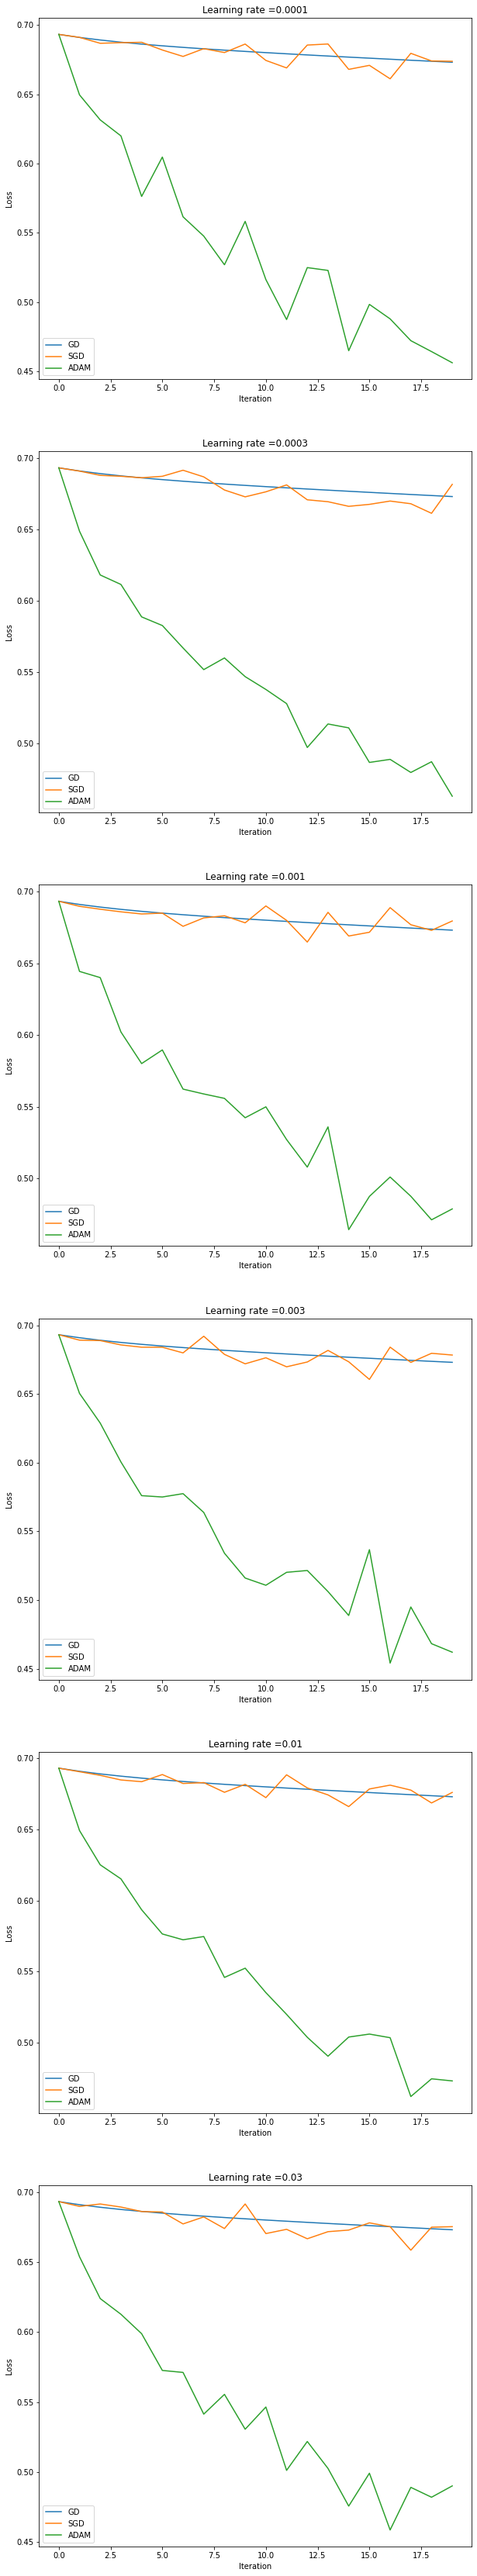

In [104]:
fig, ax = plt.subplots(6, 1, figsize = (10, 60))
for i, n in enumerate(learning_rates):
    ax[i].plot(gd_opt_model[i]['costs'] , label='GD')
    ax[i].plot(sgd_opt_model[i]['costs'] , label='SGD')
    ax[i].plot(adam_opt_model[i]['costs'] , label='ADAM')
    ax[i].set_title("Learning rate =" + str(n))
    ax[i].set_xlabel("Iteration")
    ax[i].set_ylabel("Loss")
    ax[i].legend(loc=3)

"""
While GD and SGD perform very close to each other, ADAM converges a lot faster.
For SGD and ADAM we use batches, so graphs are not that linear as GD. For GD we
use the whole dataset, therefore it converges quite 'smoothly'.
"""